<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_4_keras_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# T81-558: Applications of Deep Neural Networks
**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 6 Material

* Part 6.1: Image Processing in Python [[Video]](https://www.youtube.com/watch?v=V-IUrfTJMm4&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_1_python_images.ipynb)
* Part 6.2: Using Convolutional Neural Networks [[Video]](https://www.youtube.com/watch?v=nU_T2PPigUQ&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_2_cnn.ipynb)
* Part 6.3: Using Pretrained Neural Networks with Keras [[Video]](https://www.youtube.com/watch?v=TXqI9fp0imI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_3_resnet.ipynb)
* **Part 6.4: Looking at Keras Generators and Image Augmentation** [[Video]](https://www.youtube.com/watch?v=epfpxiXRL3U&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_4_keras_images.ipynb)
* Part 6.5: Recognizing Multiple Images with YOLOv5 [[Video]](https://www.youtube.com/watch?v=zwEmzElquHw&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_06_5_yolo.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

Note: not using Google CoLab


# Part 6.4: Inside Augmentation

The [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class provides many options for image augmentation.  Deciding which augmentations to use can impact the effectiveness of your model. This part will visualize some of these augmentations that you might use to train your neural network. We begin by loading a sample image to augment.

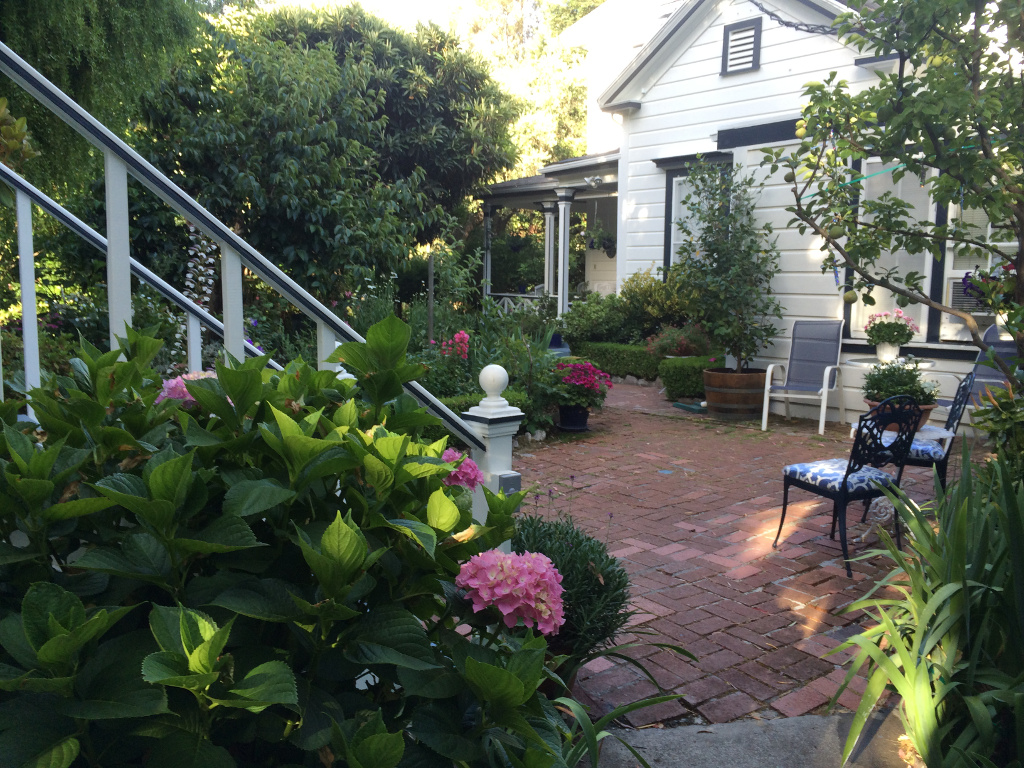

In [3]:
import urllib.request
import shutil
from IPython.display import Image

URL =  "https://github.com/jeffheaton/t81_558_deep_learning/" +\
  "blob/master/photos/landscape.jpg?raw=true"
LOCAL_IMG_FILE = "//home/adeng/Py_workingdir/datasets/image_aug/landscape.jpg"

with urllib.request.urlopen(URL) as response, \
  open(LOCAL_IMG_FILE, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

Image(filename=LOCAL_IMG_FILE)

Next, we introduce a simple utility function to visualize four images sampled from any generator.

In [5]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def visualize_generator(img_file, gen):
	# Load the requested image
  img = load_img(img_file)
  data = img_to_array(img)
  samples = expand_dims(data, 0)

	# Generat augumentations from the generator
  it = gen.flow(samples, batch_size=1)
  images = []
  for i in range(4):
    batch = it.next()
    image = batch[0].astype('uint8')
    images.append(image)

  images = np.array(images)

	# Create a grid of 4 images from the generator
  index, height, width, channels = images.shape
  nrows = index//2
    
  grid = (images.reshape(nrows, 2, height, width, channels)
            .swapaxes(1,2)
            .reshape(height*nrows, width*2, 3))
  
  fig = plt.figure(figsize=(15., 15.))
  plt.axis('off')
  plt.imshow(grid)




We begin by flipping the image. Some images may not make sense to flip, such as this landscape.  However, if you expect "noise" in your data where some images may be flipped, then this augmentation may be useful, even if it violates physical reality.

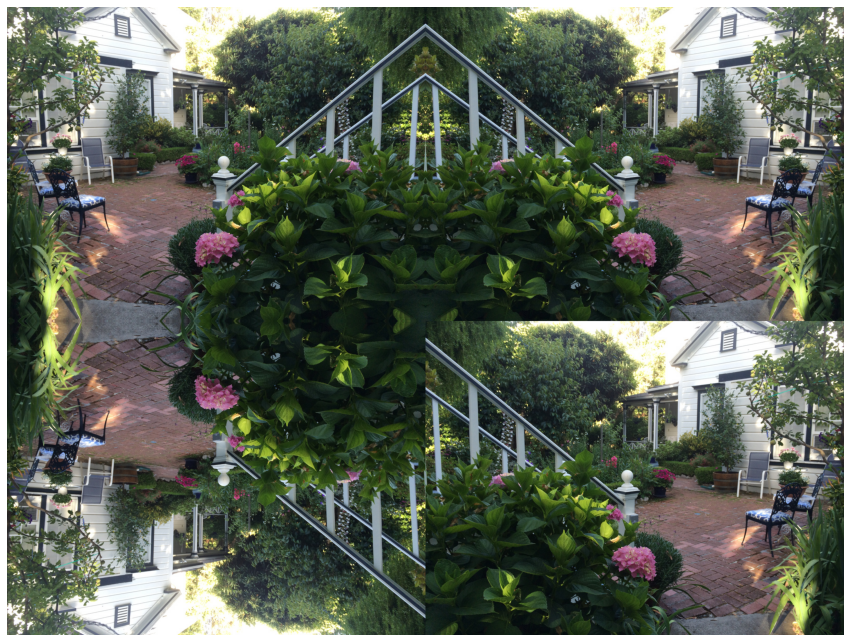

In [6]:
visualize_generator(
  LOCAL_IMG_FILE,
  ImageDataGenerator(horizontal_flip=True, vertical_flip=True))

Next, we will try moving the image. Notice how part of the image is missing? There are various ways to fill in the missing data, as controlled by **fill_mode**. In this case, we simply use the nearest pixel to fill. It is also possible to rotate images.

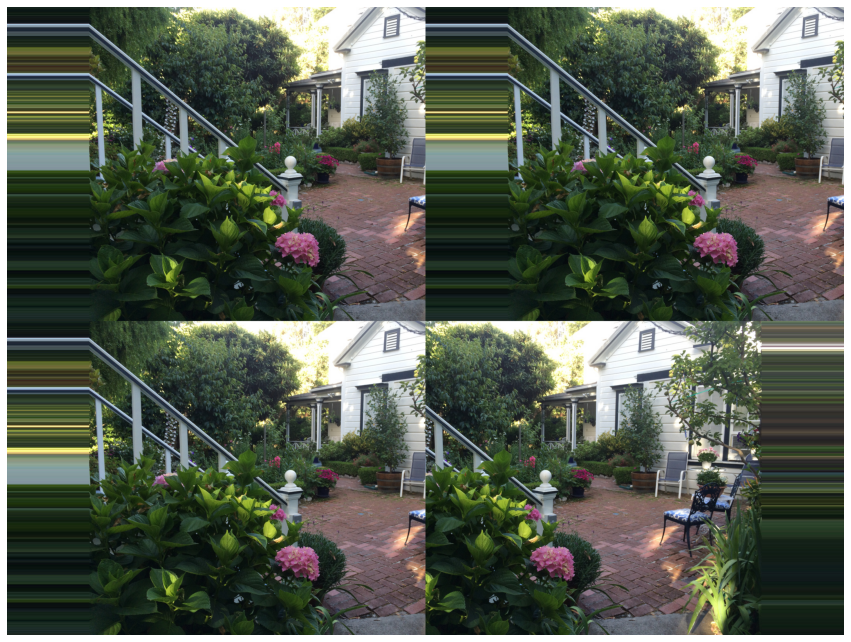

In [7]:
visualize_generator(
    LOCAL_IMG_FILE,
    ImageDataGenerator(width_shift_range=[-200,200], 
        fill_mode='nearest'))

We can also adjust brightness.

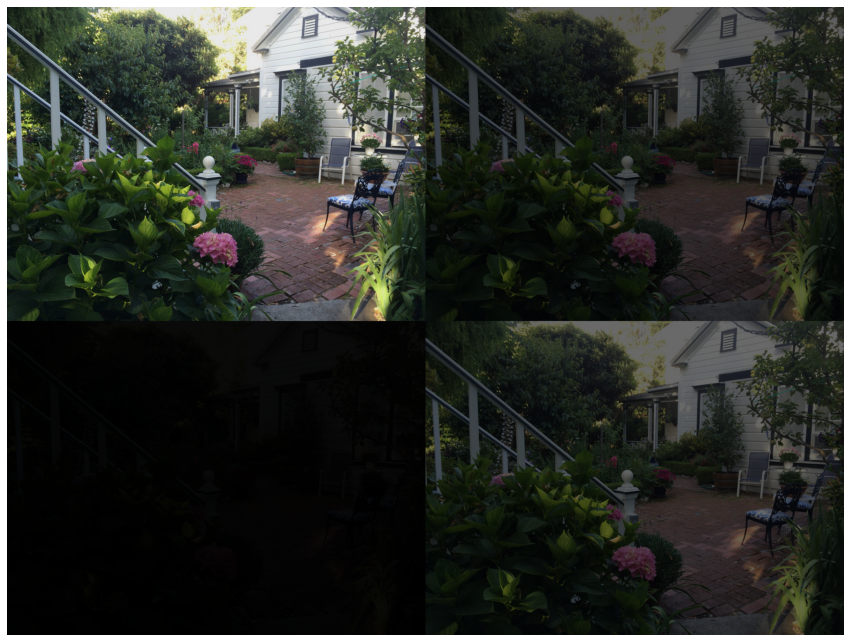

In [8]:

visualize_generator(
  LOCAL_IMG_FILE,
  ImageDataGenerator(brightness_range=[0,1]))

# brightness_range=None, shear_range=0.0

Shearing may not be appropriate for all image types, it stretches the image.

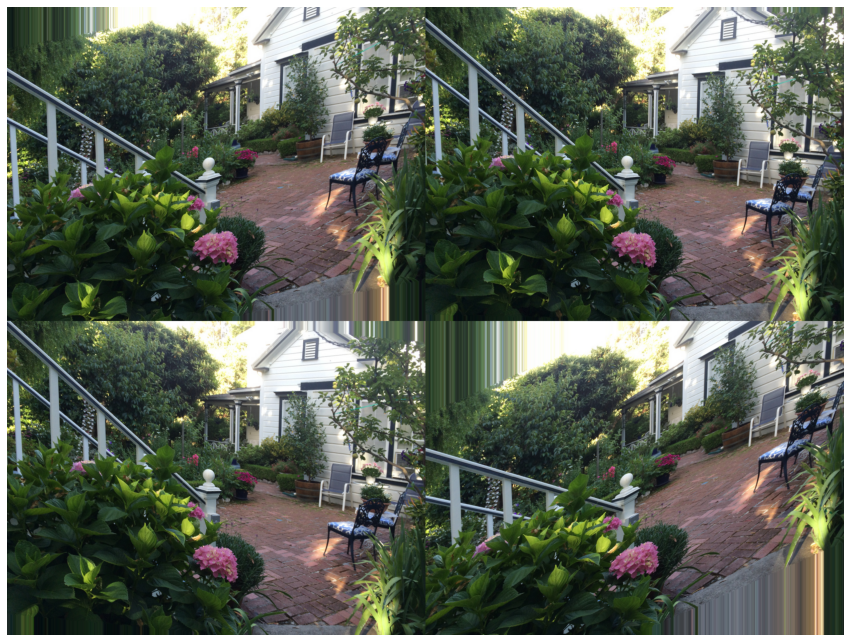

In [9]:
visualize_generator(
  LOCAL_IMG_FILE,
  ImageDataGenerator(shear_range=30))

It is also possible to rotate images.

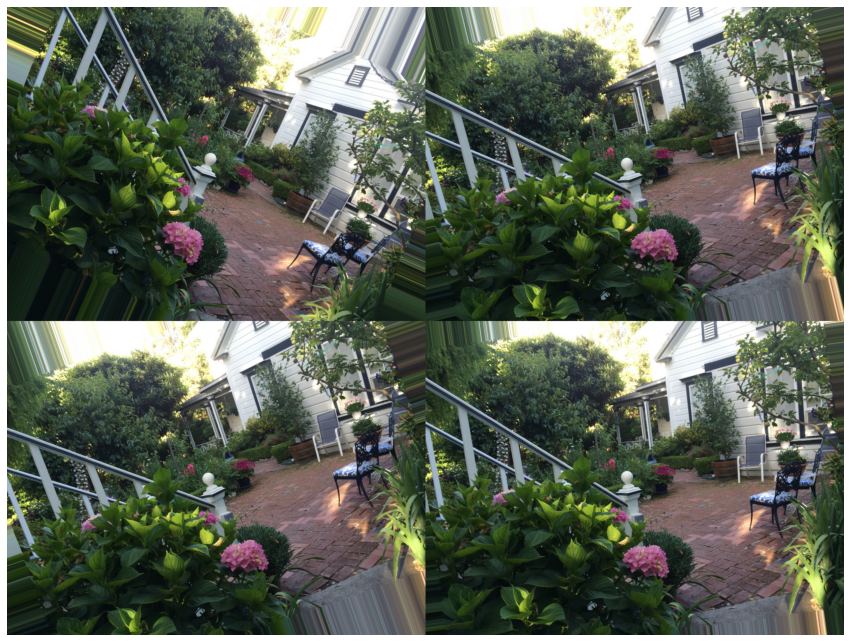

In [10]:
visualize_generator(
  LOCAL_IMG_FILE,
  ImageDataGenerator(rotation_range=30))